# Problema do Négocio

A empresa está com dificuldades na área de revenda dos automóveis usados em seu catálogo.

Para resolver esse problema, a empresa comprou uma base de dados de um marketplace de compra e venda para entender melhor o mercado nacional, de forma a conseguir precificar o seu catálogo de forma mais competitiva e assim recuperar o mau desempenho neste setor.

Seu objetivo é analisar os dados para responder às perguntas de negócios feitas pelo cliente e criar um modelo preditivo que precifique os carros do cliente de forma que eles fiquem o mais próximos dos valores de mercado.

# Analise Exploratoria dos Dados

### Pacotes Usados

In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Carregamento
Para carregar os dados foi verificado que ele tinha a separação pelo caracter tab, usando a codificação UTF-16 LE, para analise de dados foi optado realizar um merge entre as bases

In [5]:
cars_test:pd.DataFrame = pd.read_csv('/home/raullima/Documentos/Desafio Cientista de Dados 2023 9/data/cars_test.csv',encoding='UTF-16LE', sep='\t')
cars_train:pd.DataFrame = pd.read_csv('/home/raullima/Documentos/Desafio Cientista de Dados 2023 9/data/cars_train.csv',encoding='UTF-16LE', sep='\t')

In [6]:
cars_train.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


- Foi analisado que alguns dados estavam com valores categorios, foi optado por aplicar
sua conversão para valores numéricos, para realizar o treinamento do modelo e EDA.
- Para isso foi utilizado o pd.unique para identificar os valores únicos de cada coluna e o pd.factorize para converter os valores categóricos em numéricos
- Também foi armazenado as colunas para que seja identificado o valor original das variveis categoricas.

### EDA

In [7]:
cars_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

- No dataframe de Treinamento temos 1.9 de Mega Bytes de dados, sendo eles do tipo objeto, inteiro, float e boleano

In [8]:
cars_train.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado,preco
count,29407.000000,29584.000000,29584.000000,29584.000000,29584.000000,0.0,2.958400e+04
mean,10.323834,2016.758552,2017.808985,58430.592077,3.940677,NaN,1.330239e+05
std,3.487334,4.062422,2.673930,32561.769309,0.338360,NaN,8.166287e+04
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,NaN,9.869951e+03
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,NaN,7.657177e+04
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,NaN,1.143558e+05
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,NaN,1.636796e+05
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,NaN,1.359813e+06


- Neste dataset existe 29407 numero de fotos, 0 veiculo alienado ou seja contêm variavel nula ou está vazio, 29584 anos de fabricação, ano de modelo e hodometro
- O valor maximo de ano de fabricação é de 2022 e de modelo é 2023, numero de portas é de 4, com preço 1.359813e+06.
- O valor minimo de fabricação é de 1985, modelo é 1997, numero de portas 2, com preço de
- 25% dos carros têm 8 fotos, têm o ano de modelo de 2015 e fabrica de 2016, com 31235 de km rodados, com 4 portas no preço de 9.869951e+03.
- 50% dos carros têm em torno de 8 fotos também, o ano de fabricão é 2018, ano de modelo 2018, com 57244 de kilometros rodados, com 4 portas
- 75% dos carros têm em torno de 8 fotos também, o ano de fabricão é 2018, ano de modelo 2018, com 57244 de kilometros rodados, com 4 portas
- A Media dos dados são de  10 numero de fotos, 2016 e 2017 é o ano de fabricação e de modelo médio da maioria dos carros
- O Desvio padão dos dados, no ano de modelo é 4 anos e de fabricaçaõ 2 anos e com preço 8.166287e+04, logo temos uma grande variação de preço, ano de modelo, fabricação de km rodados.

* Q1: nos informa que 25% dos carros têm 8 fotos, têm o ano de modelo de 2015 e fabrica de 2016, com 31235 de km rodados, com 4 portas no preço de 9.869951e+03 e 75% dos carros têm o ano de fabricão, ano de modelo, kilometros rodados e portas maiores que 25% dos carros.

* Q2: nos informa que 50% dos carros têm em torno de 8 fotos também, o ano de fabricão é 2018, ano de modelo 2018, com 57244 de kilometros rodados, com 4 portas, e que 50% dos carros têm o ano de fabricão, ano de modelo, kilometros rodados e portas maiores que 50% dos carros.

* Q3: nos informa que 75% dos carros têm em torno de 8 fotos também, o ano de fabricão é 2018, ano de modelo 2018, com 57244 de kilometros rodados, com 4 portas, e que 75% dos carros têm o ano de fabricão, ano de modelo, kilometros rodados e portas maiores que 75% dos carros.


In [9]:
cars_train.groupby(["tipo","estado_vendedor","cambio"]).agg({"preco":"min"}).sort_values("preco")

preco
tipo                 estado_vendedor          cambio                              
Sedã                 Santa Catarina (SC)      Manual                   9869.950645
                     São Paulo (SP)           Manual                  11606.398045
Hatchback            São Paulo (SP)           Manual                  13576.401422
Picape               São Paulo (SP)           Manual                  13642.891063
Hatchback            Rio de Janeiro (RJ)      Manual                  14302.713470
                     Minas Gerais (MG)        Manual                  14464.694571
Sedã                 Minas Gerais (MG)        Manual                  15420.373080
Picape               São Paulo (SP)           Automática              15953.204811
                     Rio de Janeiro (RJ)      Manual                  16264.967340
                     Minas Gerais (MG)        Manual                  17720.564700
Hatchback            São Paulo (SP)           Automática              17911.208107
Perua/SW             São Paulo (SP)           Automática              18378.042702
Sedã                 Rio Grande do Sul (RS)   Manual                  18394.092756
                     Paraná (PR)              Automática              18525.084443
                     São Paulo (SP)           Automática              19757.196092
Perua/SW             Paraná (PR)              Manual                  19906.360817
Hatchback            Santa Catarina (SC)      Manual                  20047.460314
Picape               Paraná (PR)              Manual                  20759.094206
                     São Paulo (SP)           CVT                     21414.766620
Hatchback            Paraná (PR)              Manual                  21715.376918
Sedã                 Rio de Janeiro (RJ)      Manual                  22140.445097
                                              Automática              22661.144848
Picape               Santa Catarina (SC)      Manual                  22727.201846
Sedã                 Rio Grande do Sul (RS)   Automática Sequencial   22761.354082
Picape               Amazonas (AM)            Manual                  22935.932232
Hatchback            Rio Grande do Sul (RS)   Automática              24093.833734
                                              Manual                  25006.195653
Sedã                 Paraná (PR)              Manual                  25195.990696
                     Santa Catarina (SC)      Automática              26041.993022
                     Minas Gerais (MG)        Automática              26427.501097
Picape               Rio de Janeiro (RJ)      Automática              26729.716235
Hatchback            Bahia (BA)               Manual                  26838.814537
Sedã                 Rio de Janeiro (RJ)      Automática Sequencial   27136.964283
Hatchback            Santa Catarina (SC)      Automática              27599.208011
Picape               Rio Grande do Sul (RS)   Manual                  27690.976513
Hatchback            Rio de Janeiro (RJ)      Automática              27743.222216
Picape               Bahia (BA)               Manual                  28168.236390
Sedã                 Bahia (BA)               Manual                  28587.340678
Perua/SW             São Paulo (SP)           Manual                  28875.849751
Hatchback            São Paulo (SP)           Automatizada            28954.034946
                     Paraná (PR)              Automática              29328.116594
Picape               Pernambuco (PE)          Manual                  29624.192787
Sedã                 Rio Grande do Sul (RS)   Automática              29881.951721
Hatchback            Minas Gerais (MG)        CVT                     29906.894268
Picape               Goiás (GO)               Manual                  30259.720035
Sedã                 Rio de Janeiro (RJ)      Semi-automática         30359.737719
Hatchback            Rio Grande do Sul (RS)   Automatizada            30407.524868
Sedã      

- Agrupando o dataset pela features tipo, estado e cambio. Foi selecionado os menores preços de acordo com o agrupamento.
- Dessa forma o carro do tipo Sedão do Estado de Santa Catarina, de cambio manual custa 9869.950645.
- Hatchback, no estado de São Paulo, Manual custa 13576.401422.
- Carro do tipo Picape, do estado de São Paulo, Manual, custa em torne de 13642.891063.
- Carro do tipo Picape, do estado de São Paulo, Automático, custa em torne de 15953.204811

In [18]:
cars_train.groupby(["estado_vendedor","garantia_de_fábrica"]).min()

TypeError: '<=' not supported between instances of 'float' and 'str'

In [10]:
size_columns:int = 7
fig, axl = plt.subplots(size_columns, 2, figsize=(100, 100), constrained_layout=True)
axl[0][0].hist(cars_train['preco'], bins=100)
axl[0][0].set_title('Histograma de Preço')
axl[0][0].set_xlabel('Preço')
axl[0][0].set_ylabel('Frequência')

axl[0][1].hist(cars_train['ano_de_fabricacao'], bins=100)
axl[0][1].set_title('Histograma de Ano de Fabricação')
axl[0][1].set_xlabel('Ano de Fabricação')
axl[0][1].set_ylabel('Frequência')

axl[1][0].hist(cars_train['hodometro'], bins=100)
axl[1][0].set_title('Histograma de Hodômetro')
axl[1][0].set_xlabel('Hodômetro')
axl[1][0].set_ylabel('Frequência')

axl[1][1].hist(cars_train['ano_modelo'], bins=100)
axl[1][1].set_title('Histograma de Ano do Modelo')
axl[1][1].set_xlabel('Ano do Modelo')
axl[1][1].set_ylabel('Frequência')

axl[2][0].hist(cars_train['cidade_vendedor'], bins=100)
axl[2][0].set_title('Histograma de Cidade')
axl[2][0].set_xlabel('Cidade')
axl[2][0].set_ylabel('Frequência')

axl[2][1].hist(cars_train['estado_vendedor'], bins=100)
axl[2][1].set_title('Histograma de Estado')
axl[2][1].set_xlabel('Estado')
axl[2][1].set_ylabel('Frequência')

axl[3][0].hist(cars_train['cambio'], bins=100)
axl[3][0].set_title('Histograma de Cambio')
axl[3][0].set_xlabel('Cambio')
axl[3][0].set_ylabel('Frequência')

axl[3][1].hist(cars_train['blindado'], bins=100)
axl[3][1].set_title('Histograma de Blindado')
axl[3][1].set_xlabel('Blindado')
axl[3][1].set_ylabel('Frequência')

axl[4][0].hist(cars_train['cor'], bins=100)
axl[4][0].set_title('Histograma de Cor')
axl[4][0].set_xlabel('Cor')
axl[4][0].set_ylabel('Frequência')

axl[4][1].hist(cars_train['elegivel_revisao'], bins=100)
axl[4][1].set_title('Histograma de Revisão')
axl[4][1].set_xlabel('Revisão')
axl[4][1].set_ylabel('Frequência')

axl[5][0].hist(cars_train['modelo'], bins=100)
axl[5][0].set_title('Histograma de Modelo')
axl[5][0].set_xlabel('Modelo')
axl[5][0].set_ylabel('Frequência')

axl[5][1].hist(cars_train['versao'], bins=100)
axl[5][1].set_title('Histograma de Versão')
axl[5][1].set_xlabel('Versão')
axl[5][1].set_ylabel('Frequência')

axl[6][1].hist(cars_train['ano_modelo'], bins=100)
axl[6][1].set_title('Histograma de Ano do Modelo')
axl[6][1].set_xlabel('Ano do Modelo')
axl[6][1].set_ylabel('Frequência')


plt.show()

- 

In [ ]:
columns_list:list = cars_train.columns.tolist()
dataframe_a_c: pd.DataFrame = pd.DataFrame(columns=["Assimetria", "Curtose"])
for column in columns_list:
    try:
        data_c:pd.DataFrame = pd.DataFrame(data={"Assimetria": [cars_train[column].skew()], "Curtose": [cars_train[column].kurtosis()]},index=[column])
        dataframe_a_c = pd.concat([dataframe_a_c, data_c], ignore_index=False)
    except TypeError:
        print("Variavel Categorica")
dataframe_a_c

- Com base nos valores de assimetria e curtose, podemos classificar a curva de densidade estatística do tipo platicútica(ano_modelo) e leptocúritica(preco, ano de fabricacao, hodometro).
- é observado a presença de outlier em preço e ano de fabricação.
- Existem também picos de frequencia em faixas de Hodometro, Ano de Modelo

In [44]:
picape_estado_mais_vendida:pd.DataFrame = cars_train[cars_train["tipo"] == 'Picape']

In [45]:
picape_estado_mais_vendida[picape_estado_mais_vendida["cambio"] == "Automática"][["estado_vendedor", "preco"]].min()

estado_vendedor       Acre (AC)
preco              15953.204811
dtype: object

- No Acre o valor de uma picape é em torno de 15953.3 reais, sendo a mais barata do país.

In [51]:
cars_train.groupby(["tipo","cambio"]).agg({"preco": "min"}) # 1

preco
tipo                 cambio                              
Cupê                 Automatizada DCT       188315.122232
                     Automática             141792.183546
                     Manual                 566627.133829
Hatchback            Automatizada            28954.034946
                     Automatizada DCT        82279.216041
                     Automática              17911.208107
                     Automática Sequencial   40751.846729
                     CVT                     29906.894268
                     Manual                  13576.401422
                     Semi-automática         42639.715710
Minivan              Automática              40500.340767
                     Manual                  40844.411763
Perua/SW             Automatizada            82902.860450
                     Automática              18378.042702
                     Manual                  19906.360817
Picape               Automatizada           138137.263402
                     Automatizada DCT       124426.009378
                     Automática              15953.204811
                     CVT                     21414.766620
                     Manual                  13642.891063
                     Semi-automática         39999.777262
Sedã                 Automatizada            31970.208982
                     Automatizada DCT        71797.851976
                     Automática              18525.084443
                     Automática Sequencial   22761.354082
                     CVT                     34475.681331
                     Manual                   9869.950645
                     Semi-automática         30359.737719
Utilitário esportivo Automatizada            45598.621916
                     Automatizada DCT        82998.338089
                     Automática              39330.704347
                     Automática Sequencial  128081.352328
                     CVT                     68595.809480
                     Manual                  37736.812757
                     Semi-automática        170600.593748

In [17]:
cars_train.groupby(["tipo","cambio"]).agg({"preco": "max"}) # 1

preco
tipo                 cambio                             
Cupê                 Automatizada DCT       5.640739e+05
                     Automática             1.019841e+06
                     Manual                 5.666271e+05
Hatchback            Automatizada           3.502113e+05
                     Automatizada DCT       3.264793e+05
                     Automática             6.044799e+05
                     Automática Sequencial  1.213340e+05
                     CVT                    3.489833e+05
                     Manual                 6.762342e+05
                     Semi-automática        1.587032e+05
Minivan              Automática             9.312328e+04
                     Manual                 7.032708e+04
Perua/SW             Automatizada           8.290286e+04
                     Automática             6.609505e+05
                     Manual                 1.349465e+05
Picape               Automatizada           3.967697e+05
                     Automatizada DCT       5.070113e+05
                     Automática             1.359813e+06
                     CVT                    2.343709e+05
                     Manual                 1.140113e+06
                     Semi-automática        1.657941e+05
Sedã                 Automatizada           3.448376e+05
                     Automatizada DCT       2.083536e+05
                     Automática             7.114604e+05
                     Automática Sequencial  9.210801e+04
                     CVT                    2.926353e+05
                     Manual                 4.818381e+05
                     Semi-automática        9.529634e+04
Utilitário esportivo Automatizada           4.160203e+05
                     Automatizada DCT       2.954921e+05
                     Automática             1.349748e+06
                     Automática Sequencial  1.280814e+05
                     CVT                    2.837818e+05
                     Manual                 3.291362e+05
                     Semi-automática        2.326943e+05

In [61]:
cars_train.groupby(["estado_vendedor"])["garantia_de_fábrica"].count()

estado_vendedor
Acre (AC)                      2
Alagoas (AL)                  58
Amazonas (AM)                  9
Bahia (BA)                    51
Ceará (CE)                     1
Espírito Santo (ES)            9
Goiás (GO)                   186
Maranhão (MA)                  0
Mato Grosso (MT)               2
Mato Grosso do Sul (MS)       13
Minas Gerais (MG)            264
Paraná (PR)                  389
Paraíba (PB)                   1
Pará (PA)                     17
Pernambuco (PE)               20
Piauí (PI)                     0
Rio Grande do Norte (RN)       9
Rio Grande do Sul (RS)       281
Rio de Janeiro (RJ)          412
Rondônia (RO)                  0
Roraima (RR)                   0
Santa Catarina (SC)          330
Sergipe (SE)                   3
São Paulo (SP)              2307
Tocantins (TO)                 1
Name: garantia_de_fábrica, dtype: int64

In [64]:
cars_train.groupby(["estado_vendedor"])["preco"].agg(["min", "max", "std", "mean"])

,min,max,std,mean
estado_vendedor,,,,
Acre (AC),38626.600812,2.280221e+05,51962.306326,93106.525083
Alagoas (AL),39477.019067,3.532501e+05,65873.674973,129906.553416
Amazonas (AM),22935.932232,1.811751e+05,34982.230660,85051.223887
Bahia (BA),26838.814537,4.660679e+05,74953.128127,129285.733262
Ceará (CE),33849.242182,2.748068e+05,49326.293808,102755.663320
Espírito Santo (ES),48254.677388,1.635791e+05,34117.406996,96534.373882
Goiás (GO),30259.720035,1.349748e+06,89247.875327,153416.087865
Maranhão (MA),92743.077566,1.377092e+05,15134.135692,121041.689127
Mato Grosso (MT),59040.523844,2.763359e+05,55281.163125,143297.450639


- Podemos analisar que é mais vendido carros com garantia no estado de São Paulo, seguido de Rio de Janeiro e Paraná.
- É que a média dos valores dos carros em SP é de 129756 R$, no RJ é de 134959.822564 R$, e no PR é de 145463.002810 R$, com desvio padrão de 82498.280616, 80460.251154 e 80845.473110 respectivamente.

# Pre-Processamento

In [13]:
cars_train[[
    'marca',
    'modelo',
    'versao',
    'tipo',
    'cambio',
    'cor',
    'tipo_vendedor',
    'cidade_vendedor',
    'estado_vendedor',
    'anunciante',
    'entrega_delivery',
    'troca',
    'elegivel_revisao',
    'dono_aceita_troca',
    'revisoes_concessionaria',
    'ipva_pago',
    'veiculo_licenciado',
    'garantia_de_fábrica',
    'revisoes_dentro_agenda',
    'blindado', 'veiculo_único_dono']] = cars_train[[
    'marca',
    'modelo',
    'versao',
    'tipo',
    'cambio',
    'cor',
    'tipo_vendedor',
    'cidade_vendedor',
    'estado_vendedor',
    'anunciante',
    'entrega_delivery',
    'troca',
    'elegivel_revisao',
    'dono_aceita_troca',
    'revisoes_concessionaria',
    'ipva_pago',
    'veiculo_licenciado',
    'garantia_de_fábrica',
    'revisoes_dentro_agenda',
    'blindado', 'veiculo_único_dono']].apply(lambda x: pd.factorize(x)[0])

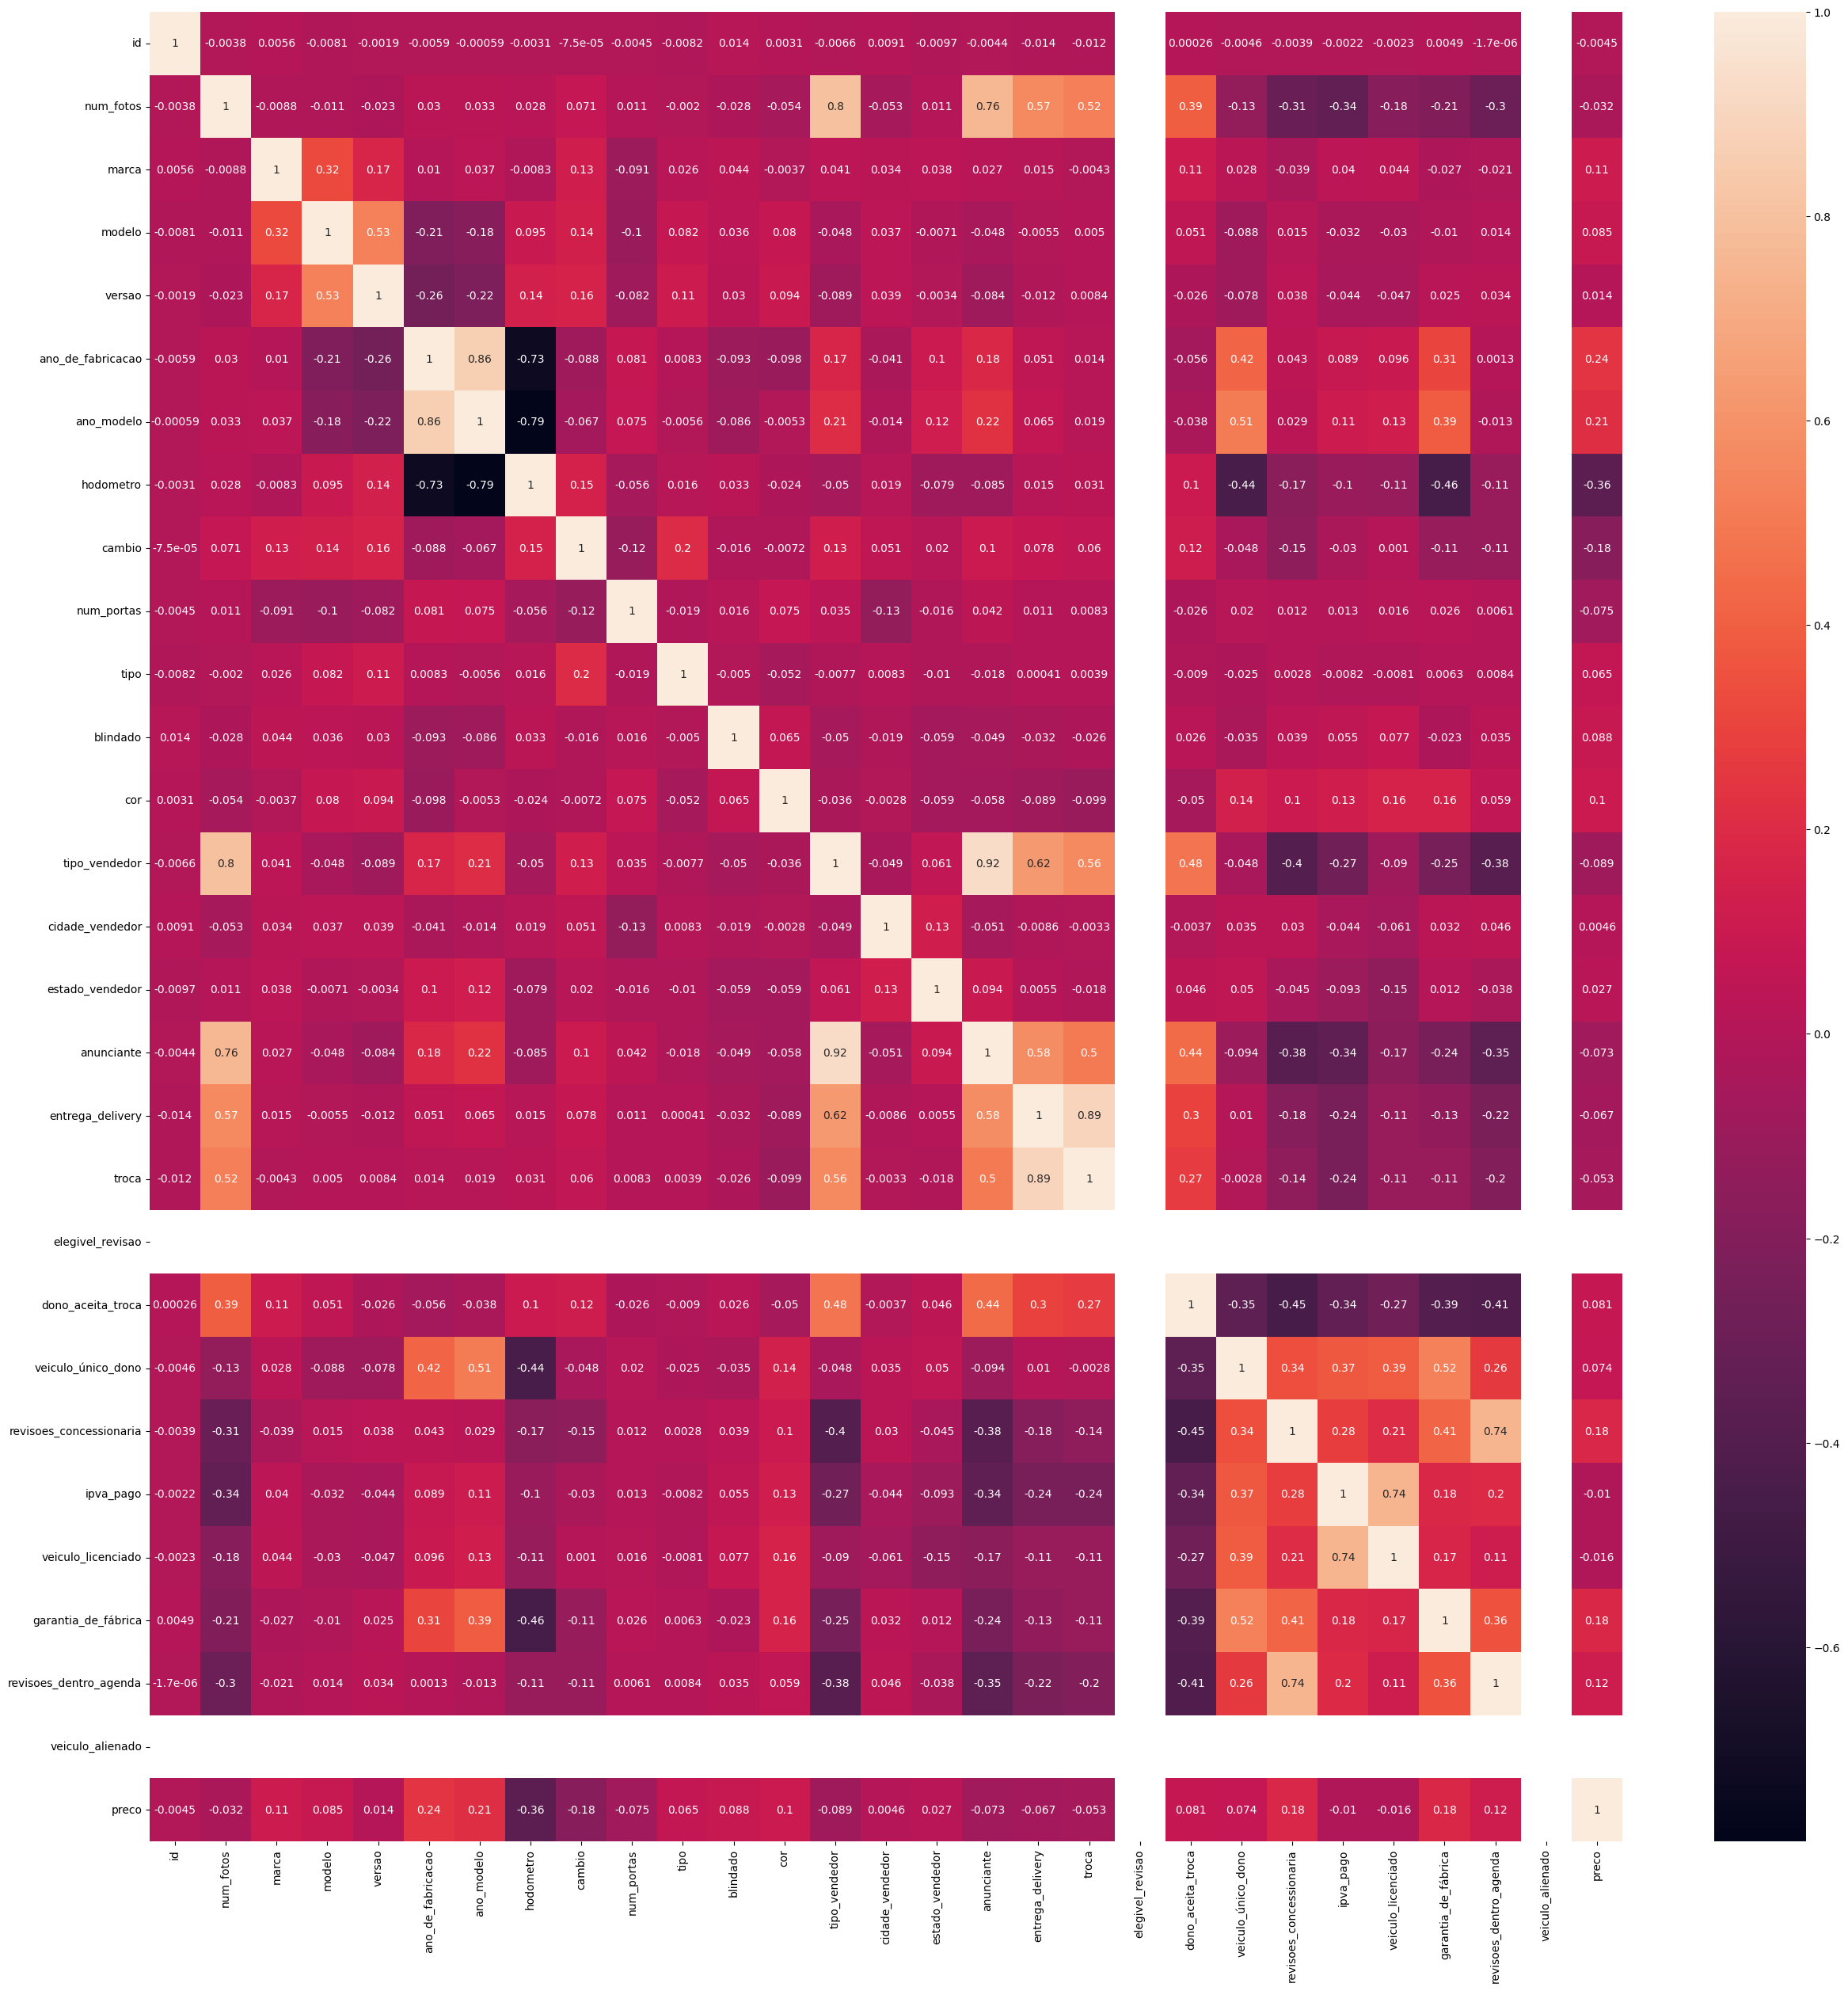

In [19]:
fig, ax = plt.subplots(figsize=(30, 30))
corrMatrix = cars_train.corr()
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()